<a href="https://colab.research.google.com/github/JefferRua/MBA_EDA/blob/main/Actividad_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Analisis Exploratorio de Datos
### Actividad 1: Exploración de un dataset
### Jefferson Rua

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Los datos de la base “"Venta Vehiculos 13-22.xlsx” corresponden a la venta mensual de automóviles en Bogotá, Cali, Envigado, Barranquilla, Bucaramanga y Medellín. El objetivo del análisis es identificar los meses en los que se registran mayores y menores ventas de automóviles e identificar si hay algún patrón. Los datos los recolecta ANDI & Fenalco, la base cuenta con las siguientes variables:

**Año**: identifica el Año (2013 a 2022)

**Mes**: identifica el Mes (enero a diciembre)

**Bogotá**: número de automóviles vendidos por mes en Bogotá

**Cali**: número de automóviles vendidos por mes en Cali

**Envigado**: número de automóviles vendidos por mes en Envigado

**Barranquilla**: número de automóviles vendidos por mes en Barranquilla

**Bucaramanga**: número de automóviles vendidos por mes en Bucaramanga

**Medellín**: número de automóviles vendidos por mes en Medellín


A excepción de Mes que es una variable String todas las demás variables de la base son numéricas, la base cuenta con 120 filas y 8 columnas y ninguna tiene valores nulos.

La pregunta **Smart** es: la pandemia afecto la venta de autos en las principales ciudades del País

In [ ]:
####Cargando base de datos con todos los condicionales
url="https://raw.githubusercontent.com/JefferRua/MBA_EDA/main/Venta%20Vehiculos%2013-22.csv"
df=pd.read_csv(url,encoding='latin-1',sep=";", thousands='.')
df

,AÑO,MES,BOGOTÁ,CALI,ENVIGADO,BARRANQUILLA,BUCARAMANGA,MEDELLÍN
0,2013,Enero,7036,1372,984,737,650,721
1,2013,Febrero,7909,1687,1281,823,669,765
2,2013,Marzo,8237,1690,1227,950,582,759
3,2013,Abril,10341,1870,1519,1100,710,947
4,2013,Mayo,9425,1940,1451,1097,654,1005
...,...,...,...,...,...,...,...,...
115,2022,Agosto,4569,1685,1217,676,194,1906
116,2022,Septiembre,4389,1664,1191,674,197,1731
117,2022,Octubre,4176,1372,1068,592,198,1454
118,2022,Noviembre,3773,1436,1074,509,206,1518


In [ ]:
##Revisión de las variables numéricas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   AÑO           120 non-null    int64 
 1   MES           120 non-null    object
 2   BOGOTÁ        120 non-null    int64 
 3   CALI          120 non-null    int64 
 4   ENVIGADO      120 non-null    int64 
 5   BARRANQUILLA  120 non-null    int64 
 6   BUCARAMANGA   120 non-null    int64 
 7   MEDELLÍN      120 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 7.6+ KB


In [ ]:
##Revisión de Valores unicos en cada Variable
df.nunique()

AÑO              10
MES              12
BOGOTÁ          119
CALI            111
ENVIGADO        109
BARRANQUILLA    110
BUCARAMANGA     105
MEDELLÍN        116
dtype: int64

In [ ]:
###Analisis de las variable no numércias, en este caso la variable MES
df.describe(include = 'object')

,MES
count,120
unique,12
top,Enero
freq,10


In [ ]:
####Revisión de los valores de la variable object MES
df['MES'].value_counts()

Enero         10
Febrero       10
Marzo         10
Abril         10
Mayo          10
Junio         10
Julio         10
Agosto        10
Septiembre    10
Octubre       10
Noviembre     10
Diciembre     10
Name: MES, dtype: int64

In [ ]:
### Inspección de valores nulos de las variables de la base
df.isnull().sum()

AÑO             0
MES             0
BOGOTÁ          0
CALI            0
ENVIGADO        0
BARRANQUILLA    0
BUCARAMANGA     0
MEDELLÍN        0
dtype: int64

In [ ]:
####Convirtiendo la variable MES en variable numérica 

meses = {
    'Enero': 1,
    'Febrero': 2,
    'Marzo': 3,
    'Abril': 4,
    'Mayo': 5,
    'Junio': 6,
    'Julio': 7,
    'Agosto': 8,
    'Septiembre': 9,
    'Octubre': 10,
    'Noviembre': 11,
    'Diciembre': 12
}

df['mes_num'] = df['MES'].apply(lambda x: meses[x])

print(df)

      AÑO         MES  BOGOTÁ  CALI  ENVIGADO  BARRANQUILLA  BUCARAMANGA  \
0    2013       Enero    7036  1372       984           737          650   
1    2013     Febrero    7909  1687      1281           823          669   
2    2013       Marzo    8237  1690      1227           950          582   
3    2013       Abril   10341  1870      1519          1100          710   
4    2013        Mayo    9425  1940      1451          1097          654   
..    ...         ...     ...   ...       ...           ...          ...   
115  2022      Agosto    4569  1685      1217           676          194   
116  2022  Septiembre    4389  1664      1191           674          197   
117  2022     Octubre    4176  1372      1068           592          198   
118  2022   Noviembre    3773  1436      1074           509          206   
119  2022   Diciembre    4111  1560      1095           565          172   

     MEDELLÍN  mes_num  
0         721        1  
1         765        2  
2         75

In [ ]:
###Estadisiticas descriptivas básicas de las variables de la base
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AÑO,120.0,2017.500000,2.884324,2013.0,2015.00,2017.5,2020.00,2022.0
BOGOTÁ,120.0,6726.875000,2403.881471,59.0,5210.50,6491.0,7991.00,16531.0
CALI,120.0,1863.050000,440.127423,0.0,1662.75,1905.0,2115.00,3128.0
ENVIGADO,120.0,1104.541667,267.122290,7.0,950.00,1086.5,1226.25,1939.0
BARRANQUILLA,120.0,801.941667,208.994041,0.0,672.00,788.5,951.25,1436.0
BUCARAMANGA,120.0,372.933333,206.746454,0.0,226.75,286.0,550.50,1052.0
MEDELLÍN,120.0,1375.750000,373.744852,0.0,1073.50,1442.0,1632.75,2383.0
mes_num,120.0,6.500000,3.466527,1.0,3.75,6.5,9.25,12.0


In [ ]:
###Transformación de la base de datos para facilitar el análisis estadístico 'combinado'
##usando la función melt de pandas 

df2 = pd.melt(df, id_vars=['AÑO', 'MES','mes_num'], var_name='ciudad', value_name='ventas')
df2

,AÑO,MES,mes_num,ciudad,ventas
0,2013,Enero,1,BOGOTÁ,7036
1,2013,Febrero,2,BOGOTÁ,7909
2,2013,Marzo,3,BOGOTÁ,8237
3,2013,Abril,4,BOGOTÁ,10341
4,2013,Mayo,5,BOGOTÁ,9425
...,...,...,...,...,...
715,2022,Agosto,8,MEDELLÍN,1906
716,2022,Septiembre,9,MEDELLÍN,1731
717,2022,Octubre,10,MEDELLÍN,1454
718,2022,Noviembre,11,MEDELLÍN,1518


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   AÑO      720 non-null    int64 
 1   MES      720 non-null    object
 2   mes_num  720 non-null    int64 
 3   ciudad   720 non-null    object
 4   ventas   720 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 28.2+ KB


In [ ]:
#Analisis Ventas promedio por mes 
ventas_mes = pd.pivot_table(df2, values='ventas', index='mes_num', columns='ciudad', aggfunc='mean')
print(ventas_mes)

ciudad   BARRANQUILLA  BOGOTÁ  BUCARAMANGA    CALI  ENVIGADO  MEDELLÍN
mes_num                                                               
1               679.2  5321.6        345.6  1507.7     934.0    1127.2
2               700.6  6353.7        357.9  1737.3    1055.7    1298.4
3               748.0  6523.4        342.3  1804.6    1081.2    1291.0
4               715.6  6080.3        346.5  1604.0     995.5    1172.5
5               797.2  6280.6        346.5  1716.9    1035.2    1316.3
6               740.6  6121.4        321.6  1761.1     989.3    1260.8
7               809.2  6597.9        373.1  1968.5    1128.6    1373.2
8               817.9  6829.0        367.1  1910.0    1188.8    1426.6
9               836.2  6926.3        427.6  1964.7    1184.2    1431.5
10              848.3  6950.6        397.1  1992.2    1154.6    1457.9
11              843.5  6976.7        381.0  2004.1    1122.6    1535.7
12             1087.0  9761.0        468.9  2385.5    1384.8    1817.9


In [ ]:
###Analisis ventas consoloidas anuales por ciudad 
ventas_año = pd.pivot_table(df2, values='ventas', index='AÑO', columns='ciudad', aggfunc='sum')
print(ventas_año)

ciudad  BARRANQUILLA  BOGOTÁ  BUCARAMANGA   CALI  ENVIGADO  MEDELLÍN
AÑO                                                                 
2013           12177  113290         8364  22414     16805     10341
2014           12165  119967         8475  26617     17647     12455
2015           10883   93762         6550  26533     13579     14247
2016            9055   85100         4616  25805     11766     17804
2017            8801   80245         3365  24273     11331     19238
2018            8854   83672         3518  23583     13510     19405
2019           10335   76408         3245  23098     13207     20429
2020            6812   47607         2141  15340      9716     14532
2021            8976   57029         2369  17937     12442     17988
2022            8175   50145         2109  17966     12542     18651


<AxesSubplot:xlabel='AÑO'>

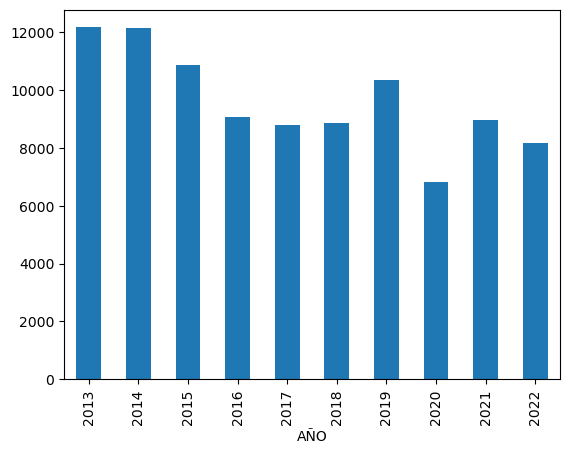

In [ ]:
ventas_año["BARRANQUILLA"].plot(kind='bar')


<AxesSubplot:xlabel='AÑO'>

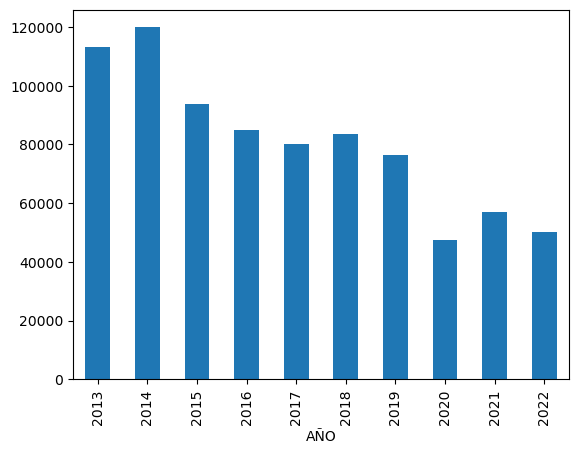

In [ ]:
ventas_año["BOGOTÁ"].plot(kind='bar')

<AxesSubplot:xlabel='AÑO'>

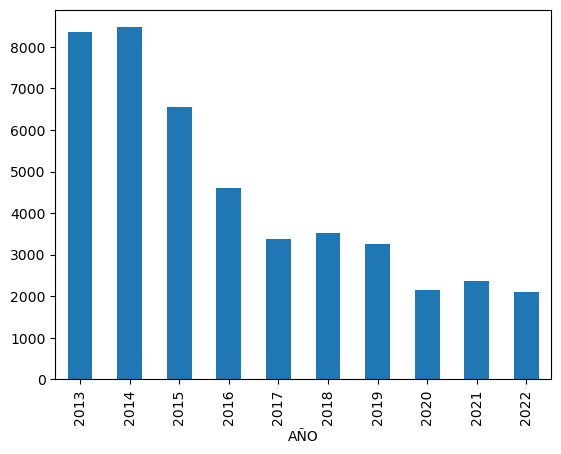

In [ ]:
ventas_año["BUCARAMANGA"].plot(kind='bar')

<AxesSubplot:xlabel='AÑO'>

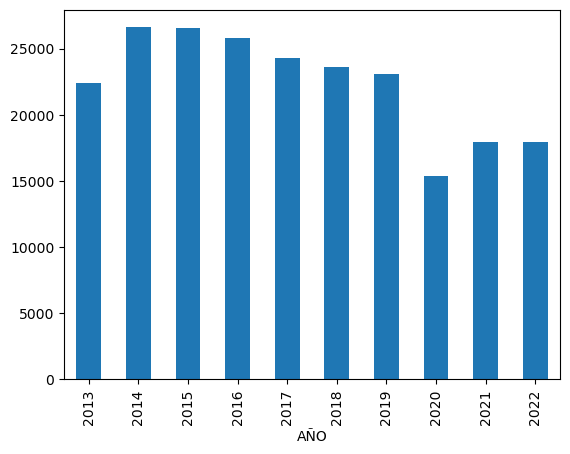

In [ ]:
ventas_año["CALI"].plot(kind='bar') 

<AxesSubplot:xlabel='AÑO'>

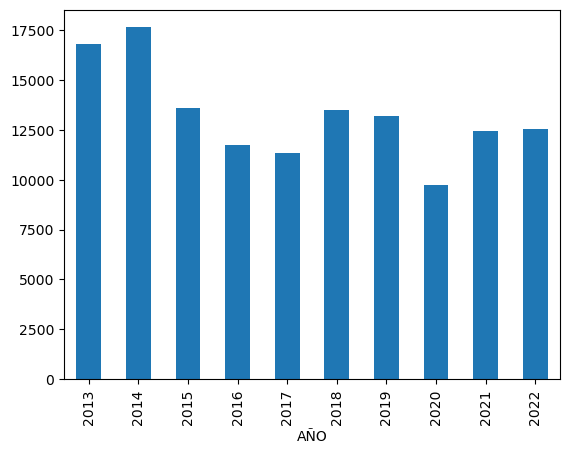

In [ ]:
ventas_año["ENVIGADO"].plot(kind='bar') 

<AxesSubplot:xlabel='AÑO'>

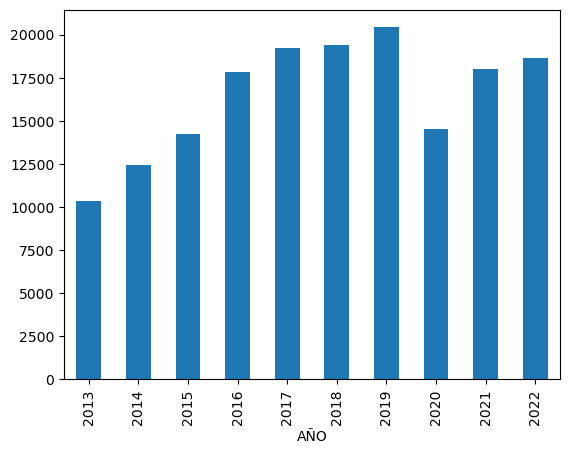

In [ ]:
ventas_año["MEDELLÍN"].plot(kind='bar')

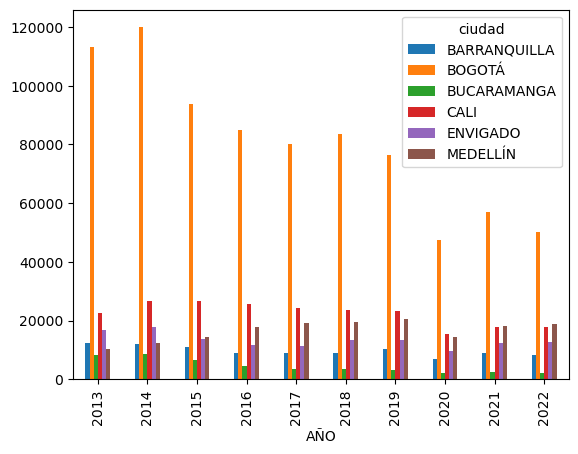

In [ ]:
ventas_año.plot(kind='bar')
plt.show()

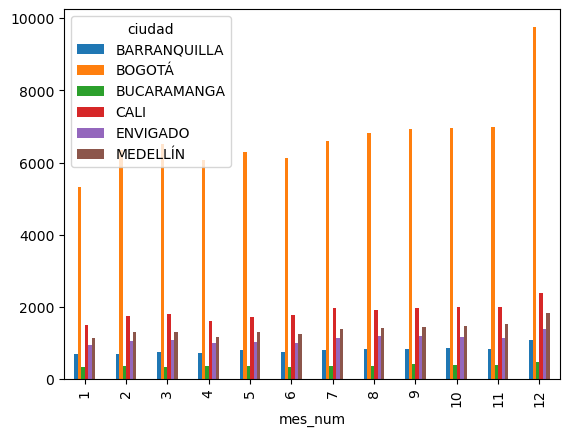

In [ ]:
ventas_mes.plot(kind='bar')
plt.show()